In [1]:
import sys
from os.path import join, abspath, pardir
from glob import glob
import numpy as np
import pandas as pd
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
from time import time
from multiprocessing import Pool
import emcee
import corner
from scipy.stats import norm, uniform

In [2]:
# import utils
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/5_Anal',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
style()

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
mcmc_dm_dir = join(root_data_dir, "MCMC-dm")
mcmc_dddm_dir = join(root_data_dir, "MCMC-dddm")
mcmc_mond_dir = join(root_data_dir, "MCMC-mond")
mcmc_no_dir = join(root_data_dir, "MCMC-no")

In [10]:
dm_files = glob(join(mcmc_dm_dir, "dm_full*"))
dm_files.sort()
dm_files

['/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(-0.10)_(0.04).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.04)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.10)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.14)_(0.18).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.18)_(0.21).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.21)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.29)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dm/dm_full_gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321005/Thesis-P

In [11]:
dddm_files = glob(join(mcmc_dddm_dir, "dd-dm_full*"))
dddm_files.sort()
dddm_files

['/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(-0.10)_(0.04).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.04)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.10)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.14)_(0.18).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.18)_(0.21).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.21)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-dddm/dd-dm_full_gaia_(0.38)_(0.40).hdf5']

In [12]:
mond_files = glob(join(mcmc_mond_dir, "mond_full*"))
mond_files.sort()
mond_files

['/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(-0.10)_(0.04).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.04)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.10)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.14)_(0.18).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.18)_(0.21).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.21)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.29)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-mond/mond_full_gaia_

In [13]:
no_files = glob(join(mcmc_no_dir, "no_full*"))
no_files.sort()
no_files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(-0.10)_(0.04).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.04)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.10)_(0.14).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.14)_(0.18).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.18)_(0.21).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.21)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.29)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.36)_(0.38).hdf5',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/no_full_gaia_(0.38)_(0.40).hdf5']

tes

In [14]:
index = 2
df_dm = vaex.open(dm_files[index])
df_dm

#,rhoDM,log_nu0,zsun,R,log_prior,log_posterior,log_likelihood,w0_0,log_sigma_w_0,a_0,rhob_0,sigmaz_0,rhob_1,sigmaz_1,rhob_2,sigmaz_2,rhob_3,sigmaz_3,rhob_4,sigmaz_4,rhob_5,sigmaz_5,rhob_6,sigmaz_6,rhob_7,sigmaz_7,rhob_8,sigmaz_8,rhob_9,sigmaz_9,rhob_10,sigmaz_10,rhob_11,sigmaz_11,walker
0,0.04678374015813381,-11.94624450970549,-0.5011595321635542,0.0033750300014539778,54.711633072876246,403.6109384718486,348.8993053989724,0.0005627925609888424,0.001819844821197059,0.001671490260706456,0.006646330836009986,3.8195220710938393,0.016516875517423653,6.946192346104021,0.006897131480182139,22.51000028319672,0.0005058030600078386,42.67505666118995,0.0005627925609888424,16.812489783911815,0.001819844821197059,5.977766578405424,0.001671490260706456,12.923756309024517,0.0028333108161169495,16.095102134967476,0.0072390015441708465,17.51414403637501,0.017862873549117517,17.207239848314423,0.005860539288308808,24.624338318856257,0.0010461490144750116,19.536543259501443,0
1,0.04678374015813381,-11.94624450970549,-0.5011595321635542,0.0033750300014539778,54.711633072876246,403.6109384718486,348.8993053989724,0.0005627925609888424,0.001819844821197059,0.001671490260706456,0.006646330836009986,3.8195220710938393,0.016516875517423653,6.946192346104021,0.006897131480182139,22.51000028319672,0.0005058030600078386,42.67505666118995,0.0005627925609888424,16.812489783911815,0.001819844821197059,5.977766578405424,0.001671490260706456,12.923756309024517,0.0028333108161169495,16.095102134967476,0.0072390015441708465,17.51414403637501,0.017862873549117517,17.207239848314423,0.005860539288308808,24.624338318856257,0.0010461490144750116,19.536543259501443,0
2,0.04678374015813381,-11.94624450970549,-0.5011595321635542,0.0033750300014539778,54.711633072876246,403.6109384718486,348.8993053989724,0.0005627925609888424,0.001819844821197059,0.001671490260706456,0.006646330836009986,3.8195220710938393,0.016516875517423653,6.946192346104021,0.006897131480182139,22.51000028319672,0.0005058030600078386,42.67505666118995,0.0005627925609888424,16.812489783911815,0.001819844821197059,5.977766578405424,0.001671490260706456,12.923756309024517,0.0028333108161169495,16.095102134967476,0.0072390015441708465,17.51414403637501,0.017862873549117517,17.207239848314423,0.005860539288308808,24.624338318856257,0.0010461490144750116,19.536543259501443,0
3,0.04678374015813381,-11.94624450970549,-0.5011595321635542,0.0033750300014539778,54.711633072876246,403.6109384718486,348.8993053989724,0.0005627925609888424,0.001819844821197059,0.001671490260706456,0.006646330836009986,3.8195220710938393,0.016516875517423653,6.946192346104021,0.006897131480182139,22.51000028319672,0.0005058030600078386,42.67505666118995,0.0005627925609888424,16.812489783911815,0.001819844821197059,5.977766578405424,0.001671490260706456,12.923756309024517,0.0028333108161169495,16.095102134967476,0.0072390015441708465,17.51414403637501,0.017862873549117517,17.207239848314423,0.005860539288308808,24.624338318856257,0.0010461490144750116,19.536543259501443,0
4,0.04678374015813381,-11.94624450970549,-0.5011595321635542,0.0033750300014539778,54.711633072876246,403.6109384718486,348.8993053989724,0.0005627925609888424,0.001819844821197059,0.001671490260706456,0.006646330836009986,3.8195220710938393,0.016516875517423653,6.946192346104021,0.006897131480182139,22.51000028319672,0.0005058030600078386,42.67505666118995,0.0005627925609888424,16.812489783911815,0.001819844821197059,5.977766578405424,0.001671490260706456,12.923756309024517,0.0028333108161169495,16.095102134967476,0.0072390015441708465,17.51414403637501,0.017862873549117517,17.207239848314423,0.005860539288308808,24.624338318856257,0.0010461490144750116,19.536543259501443,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"629,995",0.03889237120370717,-11.988958179935182,1.6253139800708527,0.002783389666401947,50.68666998543494,402.7540913987955,352.06742141336053,0.0

In [15]:
df_dm.shape

(630000, 35)

In [16]:
def get_baryon(df: vaex.dataframe.DataFrame) -> np.ndarray:
    """Get baryon fraction from a DataFrame"""
    sh = df.shape
    b = np.empty((sh[0], 12))
    for i in range(12):
        b[:, i] = df[f'rhob_{i}'].to_numpy()
    return b.sum(axis=1)

In [17]:
d_dm = df_dm['rhoDM'].to_numpy()
b_dm = get_baryon(df_dm)
d_dm, b_dm = d_dm/1E-2, b_dm/1E-2
d_dm.shape, b_dm.shape

((630000,), (630000,))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


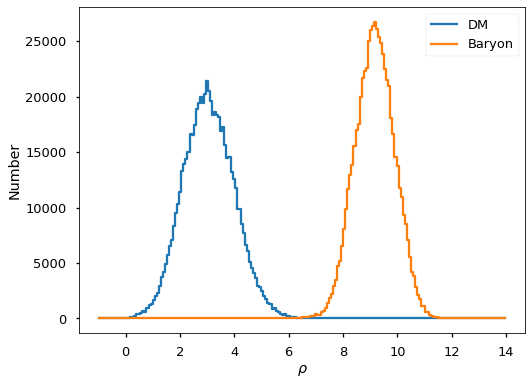

In [18]:
rho = np.linspace(-1, 14, 200)
d_num, _ = np.histogram(d_dm, bins=rho)
b_num, _ = np.histogram(b_dm, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, d_num, label='DM')
ax.step(rhomid, b_num, label='Baryon')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [19]:
# use kde to smooth the histogram
from scipy.stats import gaussian_kde
Delta = rho[1] - rho[0]
d_kde = gaussian_kde(d_dm)
b_kde = gaussian_kde(b_dm)
d_pdf = d_kde(rhomid)
b_pdf = b_kde(rhomid)

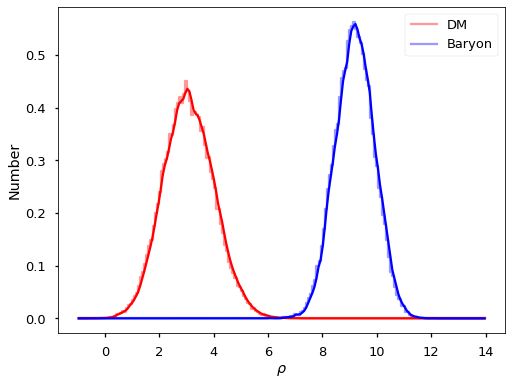

In [20]:
# plot step and kde
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, d_num/(d_num.sum()*Delta), label='DM', c="r", alpha=0.4)
ax.step(rhomid, b_num/(b_num.sum()*Delta), label='Baryon', c="b", alpha=0.4)
ax.plot(rhomid, d_pdf, c="r")
ax.plot(rhomid, b_pdf, c="b")
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

do the same for mond and no

In [21]:
index = 2
df_dm = vaex.open(dm_files[index])
df_dddm = vaex.open(dddm_files[index])
df_mond = vaex.open(mond_files[index])
df_no = vaex.open(no_files[index])

In [22]:
from utils import sample_rhob

In [23]:
tot = len(df_no)
nwalkers = df_no['walker'].to_numpy().max() + 1
nsteps = tot//nwalkers
nsteps, nwalkers

(10000, 61)

In [24]:
df_dddm

#,rhoDM,sigmaDD,log_hDD,log_nu0,zsun,R,log_prior,log_posterior,log_likelihood,w0_0,log_sigma_w_0,a_0,rhob_0,sigmaz_0,rhob_1,sigmaz_1,rhob_2,sigmaz_2,rhob_3,sigmaz_3,rhob_4,sigmaz_4,rhob_5,sigmaz_5,rhob_6,sigmaz_6,rhob_7,sigmaz_7,rhob_8,sigmaz_8,rhob_9,sigmaz_9,rhob_10,sigmaz_10,rhob_11,sigmaz_11,walker
0,-0.028981575280373366,20.10395346023582,3.781974411867972,-11.93880903353419,-7.716077178194293,0.002769262701512906,43.71614504123101,401.49988723435246,357.78374219312144,0.002769262701512906,-7.16497135116391,2.0794282837754,0.01466832882164724,3.7526323646390543,0.03971333729330881,6.475226757123853,0.008228526452879279,21.581226141509013,0.0005041701812307635,38.41656821334308,0.000563012857278119,14.582632659943723,0.0014647938879793797,8.858240894196651,0.001982398831480124,12.66209142638008,0.0030771712109829642,16.078859165982987,0.0068509220902155665,19.48605800995861,0.017238615451440613,19.579851597363596,0.004650648367659453,22.56606371962276,0.001468951992878463,18.39614790612608,0
1,-0.028981575280373366,20.10395346023582,3.781974411867972,-11.93880903353419,-7.716077178194293,0.002769262701512906,43.71614504123101,401.49988723435246,357.78374219312144,0.002769262701512906,-7.16497135116391,2.0794282837754,0.01466832882164724,3.7526323646390543,0.03971333729330881,6.475226757123853,0.008228526452879279,21.581226141509013,0.0005041701812307635,38.41656821334308,0.000563012857278119,14.582632659943723,0.0014647938879793797,8.858240894196651,0.001982398831480124,12.66209142638008,0.0030771712109829642,16.078859165982987,0.0068509220902155665,19.48605800995861,0.017238615451440613,19.579851597363596,0.004650648367659453,22.56606371962276,0.001468951992878463,18.39614790612608,0
2,-0.028981575280373366,20.10395346023582,3.781974411867972,-11.93880903353419,-7.716077178194293,0.002769262701512906,43.71614504123101,401.49988723435246,357.78374219312144,0.002769262701512906,-7.16497135116391,2.0794282837754,0.01466832882164724,3.7526323646390543,0.03971333729330881,6.475226757123853,0.008228526452879279,21.581226141509013,0.0005041701812307635,38.41656821334308,0.000563012857278119,14.582632659943723,0.0014647938879793797,8.858240894196651,0.001982398831480124,12.66209142638008,0.0030771712109829642,16.078859165982987,0.0068509220902155665,19.48605800995861,0.017238615451440613,19.579851597363596,0.004650648367659453,22.56606371962276,0.001468951992878463,18.39614790612608,0
3,-0.028981575280373366,20.10395346023582,3.781974411867972,-11.93880903353419,-7.716077178194293,0.002769262701512906,43.71614504123101,401.49988723435246,357.78374219312144,0.002769262701512906,-7.16497135116391,2.0794282837754,0.01466832882164724,3.7526323646390543,0.03971333729330881,6.475226757123853,0.008228526452879279,21.581226141509013,0.0005041701812307635,38.41656821334308,0.000563012857278119,14.582632659943723,0.0014647938879793797,8.858240894196651,0.001982398831480124,12.66209142638008,0.0030771712109829642,16.078859165982987,0.0068509220902155665,19.48605800995861,0.017238615451440613,19.579851597363596,0.004650648367659453,22.56606371962276,0.001468951992878463,18.39614790612608,0
4,-0.028981575280373366,20.10395346023582,3.781974411867972,-11.93880903353419,-7.716077178194293,0.002769262701512906,43.71614504123101,401.49988723435246,357.78374219312144,0.002769262701512906,-7.16497135116391,2.0794282837754,0.01466832882164724,3.7526323646390543,0.03971333729330881,6.475226757123853,0.008228526452879279,21.581226141509013,0.0005041701812307635,38.41656821334308,0.000563012857278119,14.582632659943723,0.0014647938879793797,8.858240894196651,0.001982398831480124,12.66209142638008,0.0030771712109829642,16.078859165982987,0.0068509220902155665,19.48605800995861,0.017238615451440613,19.579851597363596,0.004650648367659453,22.56606371962276,0.001468951992878463,18.39614790612608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"3,349,99

In [27]:
# dm halo
d_dm = df_dm['rhoDM'].to_numpy()
b_dm = get_baryon(df_dm)
d_dm, b_dm = d_dm/1E-2, b_dm/1E-2
# dm dd
d_dddm = df_dddm['rhoDM'].to_numpy() + df_dddm['sigmaDD'].to_numpy()/(4*np.exp(df_dddm['log_hDD'].to_numpy()))
b_dddm = get_baryon(df_dddm)
d_dddm, b_dddm = d_dddm/1E-2, b_dddm/1E-2
# mond
mu0 = np.exp(df_mond['log_mu0'].to_numpy())
b_mond = get_baryon(df_mond)
d_mond = b_mond*(1/mu0 - 1)
d_mond, b_mond = d_mond/1E-2, b_mond/1E-2
# no
b_no = sample_rhob(rhos, e_rhos, nwalkers, nsteps).sum(axis=2)
# reshuflle b_no, turn into pandas dataframe, then sample 100%
b_no = pd.DataFrame(b_no).sample(frac=1).values.flatten()
d_no = get_baryon(df_no) - b_no
d_no, b_no = d_no/1E-2, b_no/1E-2

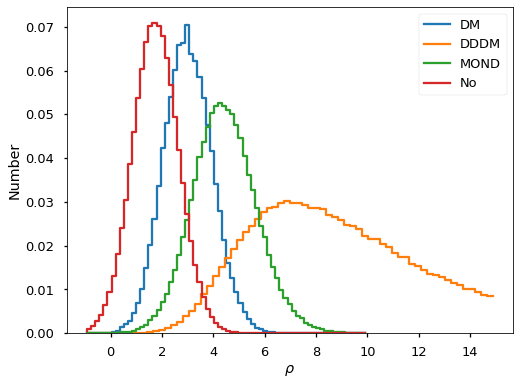

In [38]:
# dark
rho_dm = np.linspace(-1, 10, 70)
rhomid_dm = 0.5*(rho_dm[1:] + rho_dm[:-1])
d_num_dm, _ = np.histogram(d_dm, bins=rho_dm)

rho_dddm = np.linspace(-1, 15, 70)
rhomid_dddm = 0.5*(rho_dddm[1:] + rho_dddm[:-1])
d_num_dddm, _ = np.histogram(d_dddm, bins=rho_dddm)

rho_mond = np.linspace(-1, 10, 70)
rhomid_mond = 0.5*(rho_mond[1:] + rho_mond[:-1])
d_num_mond, _ = np.histogram(d_mond, bins=rho_mond)

rho_no = np.linspace(-1, 10, 70)
rhomid_no = 0.5*(rho_no[1:] + rho_no[:-1])
d_num_no, _ = np.histogram(d_no, bins=rho_no)

# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid_dm, d_num_dm/d_num_dm.sum(), label='DM')
ax.step(rhomid_dddm, d_num_dddm/d_num_dddm.sum(), label='DDDM')
ax.step(rhomid_mond, d_num_mond/d_num_mond.sum(), label='MOND')
ax.step(rhomid_no, d_num_no/d_num_no.sum(), label='No')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.set_ylim(0)
ax.legend()
plt.show()

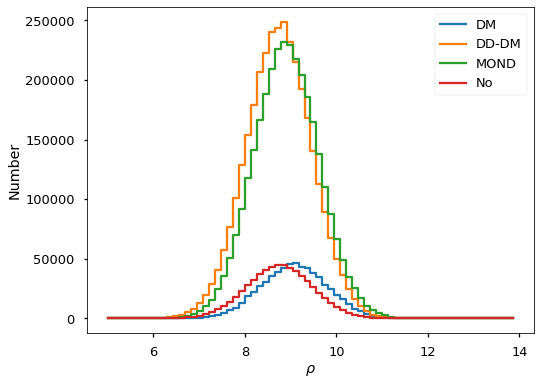

In [44]:
# baryon
rho = np.linspace(5, 14, 70)
b_num_dm, _ = np.histogram(b_dm, bins=rho)
b_num_dddm, _ = np.histogram(b_dddm, bins=rho)
b_num_mond, _ = np.histogram(b_mond, bins=rho)
b_num_no, _ = np.histogram(b_no, bins=rho)

# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rho[:-1], b_num_dm, label='DM')
ax.step(rho[:-1], b_num_dddm, label='DD-DM')
ax.step(rho[:-1], b_num_mond, label='MOND')
ax.step(rho[:-1], b_num_no, label='No')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

# DM halo only

In [45]:
from tqdm import tqdm
import re

rho = np.linspace(-2, 10, 70)
rhomid = 0.5*(rho[1:] + rho[:-1])
Delta = rho[1] - rho[0]

dm = []
bary = []
c0s = []
c1s = []
# regex whit pattern inside parenthesis
# ex. abd(123)-(234)efg -> [123, 234]
pattern = re.compile(r'\((.*?)\)')

for file in tqdm(dm_files):
    name = file.split('/')[-1]
    c0, c1 = pattern.findall(name)
    c0, c1 = float(c0), float(c1)
    c0s.append(c0)
    c1s.append(c1)
    df_dm = vaex.open(file)
    d_dm = df_dm['rhoDM'].to_numpy()
    b_dm = get_baryon(df_dm)
    d_dm, b_dm = d_dm/1E-2, b_dm/1E-2

    d_num_dm, _ = np.histogram(d_dm, bins=rho, density=True)
    b_num_dm, _ = np.histogram(b_dm, bins=rho, density=True)

    dm.append(d_num_dm)
    bary.append(b_num_dm)

100%|██████████| 13/13 [00:13<00:00,  1.05s/it]


In [55]:
c0s, c1s

([-0.1, 0.04, 0.1, 0.14, 0.18, 0.21, 0.24, 0.27, 0.29, 0.32, 0.34, 0.36, 0.38],
 [0.04, 0.1, 0.14, 0.18, 0.21, 0.24, 0.27, 0.29, 0.32, 0.34, 0.36, 0.38, 0.4])

In [46]:
c = np.array([c0s, c1s]).T
c = np.mean(c, axis=1)
c

array([-0.03 ,  0.07 ,  0.12 ,  0.16 ,  0.195,  0.225,  0.255,  0.28 ,
        0.305,  0.33 ,  0.35 ,  0.37 ,  0.39 ])

In [47]:
from scipy import integrate

# Highest density interval of {perc}% of normalized distribution
def hdi(func, perc=0.68, res=1E3, min=0.0, max=1.0):
  r""" Highest density interval of {perc}% of normalized distribution
  perc: percentile
  res: resolution, number of sampling from distributiion
  min: min x-value
  max: max x-value
  """
  x = np.linspace(min, max, int(res))
  y = func(x)
  upper = np.max(y)*0.99
  below = 0
  for k in range(10):
    ys = np.linspace(upper, below, 10)
    for i in range(10):
      mask = y > ys[i]
      x_mask = x[mask]
      integral, _ = integrate.quad(func, a=x_mask[0], b=x_mask[-1])
      if(integral > perc): break
    upper = ys[i-1]
    below = ys[i]
    xMin = x_mask[0]
    xMax = x_mask[-1]
  return (xMin, xMax)

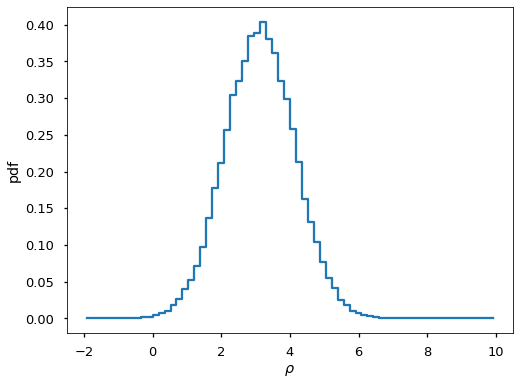

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, dm[0])
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('pdf')
plt.show()

In [49]:
mean = np.sum(rhomid*dm[0])/np.sum(dm[0])
std = np.sqrt(np.sum((rhomid - mean)**2*dm[0])/np.sum(dm[0]))
print(mean, std)

3.216187991718426 1.0078073678511486


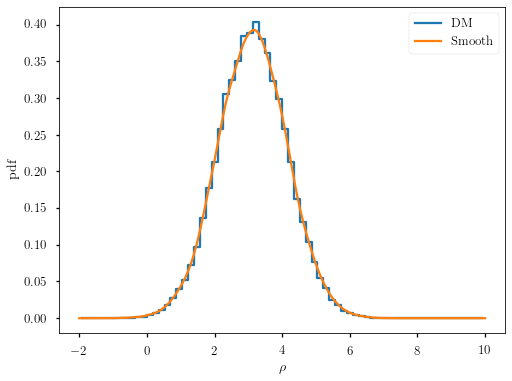

In [65]:
# smooth the distribution using gaussian window
from scipy.stats import norm

def smooth(x, xd, yd, scale):
    y_smooth = np.zeros_like(x)
    for i in range(len(x)):
        y_smooth[i] = np.sum(yd*norm.pdf(xd, x[i], scale))
    area = np.trapz(y_smooth, x)
    y_smooth /= area
    return y_smooth

x = np.linspace(rho[0], rho[-1], 300)
y = smooth(x, rho[:-1], dm[0], std/3)
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, dm[0], label='DM')
ax.plot(x, y, label='Smooth')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('pdf')
ax.legend()
plt.show()

In [51]:
from scipy.interpolate import interp1d

func_dm = interp1d(x, y, kind='cubic')

xs = np.linspace(rho[0], rho[-1], 1000)
mean_interp = np.sum(xs*func_dm(xs))/np.sum(func_dm(xs))
xl_68, xr_68 = hdi(func_dm, perc=0.68, res=1E3, min=xs[0], max=xs[-1])
xl_90, xr_90 = hdi(func_dm, perc=0.90, res=1E3, min=xs[0], max=xs[-1])
xl_95, xr_95 = hdi(func_dm, perc=0.95, res=1E3, min=xs[0], max=xs[-1])

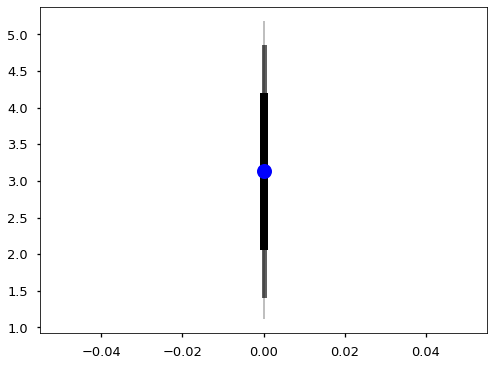

In [52]:
N = 100
# plot

def plot_dot(x, xv, mean, N=100, ms=15, c='k'):
    maks_size = list(map(lambda l: l[2], xv))
    for xi in xv:
        line = np.linspace(xi[0], xi[1], N)
        plt.plot(np.repeat(x, N), line, lw=xi[2], c=c, alpha=xi[2]/8)
    plt.plot(x, mean, c='b', marker='o', ms=ms)

xv = [[xl_95, xr_95, 2], [xl_90, xr_90, 5], [xl_68, xr_68, 8]]

plt.figure(figsize=(8, 6))
plot_dot(0, xv, mean_interp)
# remove x values
# plt.xticks([])
plt.show()

## do it for other color

100%|██████████| 13/13 [00:44<00:00,  3.39s/it]


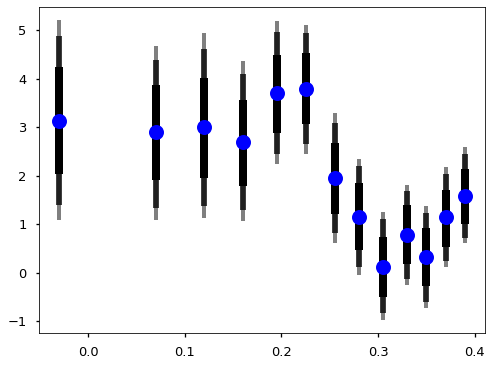

In [53]:
funcs = []
xvs = []
means = []
plt.figure(figsize=(8, 6))
for dmi, ci in zip(tqdm(dm), c):
    mean = np.sum(rhomid*dmi)/np.sum(dmi)
    std = np.sqrt(np.sum((rhomid - mean)**2*dmi)/np.sum(dmi))

    x = np.linspace(rho[0], rho[-1], 300)
    y = smooth(x, rho[:-1], dmi, std/5)

    func_dm = interp1d(x, y, kind='cubic')
    funcs.append(func_dm)

    xs = np.linspace(rho[0], rho[-1], 1000)
    mean_interp = np.sum(xs*func_dm(xs))/np.sum(func_dm(xs))
    xl_68, xr_68 = hdi(func_dm, perc=0.68, res=1E3, min=xs[0], max=xs[-1])
    xl_90, xr_90 = hdi(func_dm, perc=0.90, res=1E3, min=xs[0], max=xs[-1])
    xl_95, xr_95 = hdi(func_dm, perc=0.95, res=1E3, min=xs[0], max=xs[-1])

    xv = [[xl_95, xr_95, 4], [xl_90, xr_90, 6], [xl_68, xr_68, 8]]
    xvs.append(xv)
    means.append(mean_interp)
    plot_dot(ci, xv, mean_interp)
plt.show()

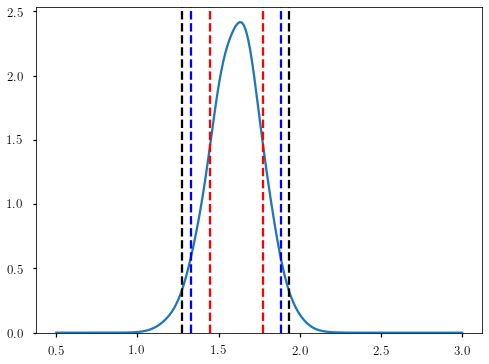

[[0.35 0.31]
 [0.3  0.25]
 [0.19 0.13]] 1.61


In [61]:
# multiplying each pdf
def multiply_pdf(x, funcs):
    y = np.ones_like(x)
    for func in funcs:
        y *= func(x)
    return y

x = np.linspace(0.5, 3, 200)
y = multiply_pdf(x, funcs)
area = np.trapz(y, x)
y /= area

func_dm = interp1d(x, y, kind='cubic')

mean_all = np.sum(x*func_dm(x))/np.sum(func_dm(x))
xl_68, xr_68 = hdi(func_dm, perc=0.68, res=1E3, min=x[0], max=x[-1])
xl_90, xr_90 = hdi(func_dm, perc=0.90, res=1E3, min=x[0], max=x[-1])
xl_95, xr_95 = hdi(func_dm, perc=0.95, res=1E3, min=x[0], max=x[-1])

xv_all = [[xl_95, xr_95, 2], [xl_90, xr_90, 4], [xl_68, xr_68, 6]]

plt.figure(figsize=(8, 6))
plt.plot(x, func_dm(x))
plt.axvline(xl_95, c='k', ls='--')
plt.axvline(xr_95, c='k', ls='--')
plt.axvline(xl_90, c='b', ls='--')
plt.axvline(xr_90, c='b', ls='--')
plt.axvline(xl_68, c='r', ls='--')
plt.axvline(xr_68, c='r', ls='--')
plt.ylim(0)
plt.show()
sigmas = np.array(list(map(lambda l: [l[1]-mean_interp, mean_interp-l[0]], xv_all)))
print(np.round(sigmas, 2), np.round(mean_all, 2))

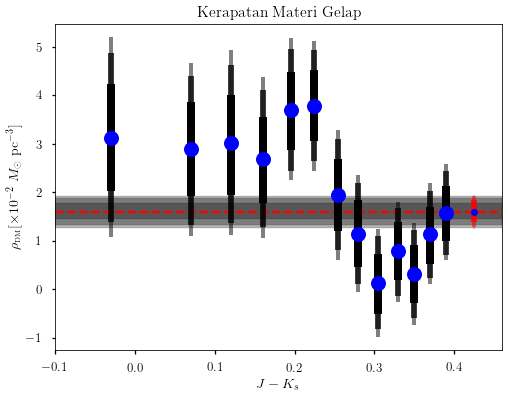

In [59]:
x = np.linspace(rho[0], rho[-1], 300)
xs = np.linspace(rho[0], rho[-1], 1000)
xlim = (c[0] - (c[-1]-c[0])/12*2, (c[-1]-c[0])/12*2+c[-1])
cs = np.linspace(xlim[0], xlim[1], 100)
plt.figure(figsize=(8, 6))
plt.axhline(mean_all, c='r', ls='--')
for xv, ci, mean in zip(xvs, c, means):
    plot_dot(ci, xv, mean)
plot_dot((c[-1]-c[0])/12+c[-1], xv_all, mean_all, ms=7, c='r')
for xv in xv_all:
    plt.fill_between(cs, xv[0], xv[1], color='k', alpha=0.3)
plt.xlim(xlim)
plt.xlabel(r'$J-K_s$')
plt.ylabel(r"$\rho_{\textup{\scriptsize DM}} [\times 10^{-2}\ M_{\odot}\ \textup{pc}^{-3}]$")
plt.title("Kerapatan Materi Gelap")
plt.savefig('darky.jpg', dpi=150)
plt.show()


# Mond

In [96]:
from tqdm import tqdm
import re

rho = np.linspace(-2, 13, 100)
mu = np.linspace(0.1, 2, 100)
rhomid = 0.5*(rho[1:] + rho[:-1])
Delta = rho[1] - rho[0]

dm = []
mu0s = []
bary = []
c0s = []
c1s = []
# regex whit pattern inside parenthesis
# ex. abd(123)-(234)efg -> [123, 234]
pattern = re.compile(r'\((.*?)\)')

for file in tqdm(mond_files):
    name = file.split('/')[-1]
    c0, c1 = pattern.findall(name)
    c0, c1 = float(c0), float(c1)
    c0s.append(c0)
    c1s.append(c1)
    df_mond = vaex.open(file)
    mu0 = np.exp(df_mond['log_mu0'].to_numpy())
    b_mond = get_baryon(df_mond)
    d_mond = b_mond*(1/mu0 - 1)
    d_mond, b_mond = d_mond/1E-2, b_mond/1E-2

    d_num_mond, _ = np.histogram(d_mond, bins=rho, density=True)
    b_num_mond, _ = np.histogram(b_mond, bins=rho, density=True)
    mu0_num_mond, _ = np.histogram(mu0, bins=mu, density=True)
    dm.append(d_num_mond)
    bary.append(b_num_mond)
    mu0s.append(mu0_num_mond)

100%|██████████| 13/13 [00:12<00:00,  1.06it/s]


In [97]:
c = np.array([c0s, c1s]).T
c = np.mean(c, axis=1)
c

array([-0.03 ,  0.07 ,  0.12 ,  0.16 ,  0.195,  0.225,  0.255,  0.28 ,
        0.305,  0.33 ,  0.35 ,  0.37 ,  0.39 ])

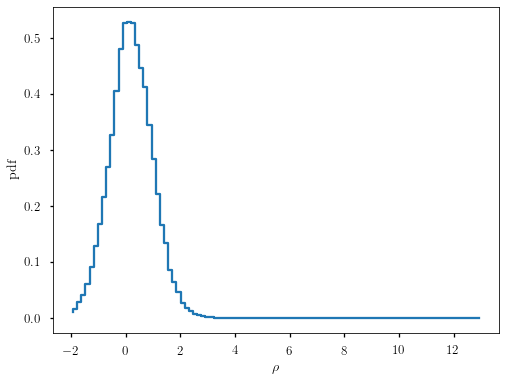

In [117]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, dm[9])
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('pdf')
plt.show()

In [73]:
mean = np.sum(rhomid*dm[0])/np.sum(dm[0])
std = np.sqrt(np.sum((rhomid - mean)**2*dm[0])/np.sum(dm[0]))
print(mean, std)

4.002214483627494 1.2964656934918033


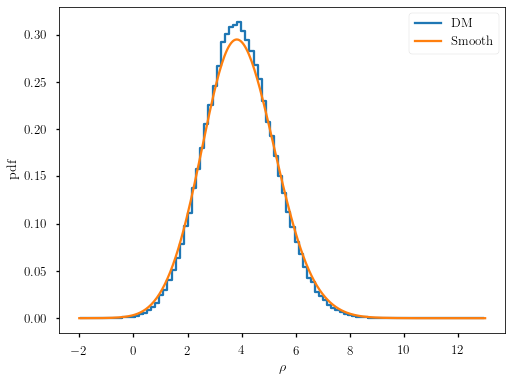

In [74]:
# smooth the distribution using gaussian window
from scipy.stats import norm

def smooth(x, xd, yd, scale):
    y_smooth = np.zeros_like(x)
    for i in range(len(x)):
        y_smooth[i] = np.sum(yd*norm.pdf(xd, x[i], scale))
    area = np.trapz(y_smooth, x)
    y_smooth /= area
    return y_smooth

x = np.linspace(rho[0], rho[-1], 300)
y = smooth(x, rho[:-1], dm[0], std/3)
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, dm[0], label='DM')
ax.plot(x, y, label='Smooth')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('pdf')
ax.legend()
plt.show()

In [76]:
from scipy.interpolate import interp1d

func_dm = interp1d(x, y, kind='cubic')

xs = np.linspace(rho[0], rho[-1], 1000)
mean_interp = np.sum(xs*func_dm(xs))/np.sum(func_dm(xs))
xl_68, xr_68 = hdi(func_dm, perc=0.68, res=1E3, min=xs[0], max=xs[-1])
xl_90, xr_90 = hdi(func_dm, perc=0.90, res=1E3, min=xs[0], max=xs[-1])
xl_95, xr_95 = hdi(func_dm, perc=0.95, res=1E3, min=xs[0], max=xs[-1])

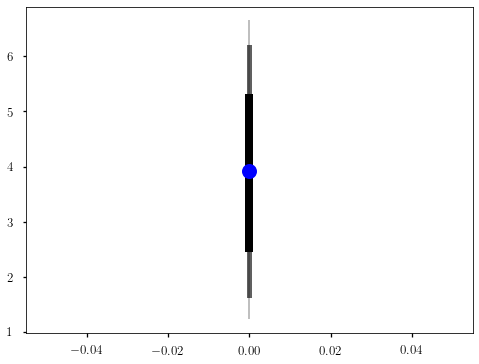

In [77]:
N = 100
# plot

def plot_dot(x, xv, mean, N=100, ms=15, c='k'):
    maks_size = list(map(lambda l: l[2], xv))
    for xi in xv:
        line = np.linspace(xi[0], xi[1], N)
        plt.plot(np.repeat(x, N), line, lw=xi[2], c=c, alpha=xi[2]/8)
    plt.plot(x, mean, c='b', marker='o', ms=ms)

xv = [[xl_95, xr_95, 2], [xl_90, xr_90, 5], [xl_68, xr_68, 8]]

plt.figure(figsize=(8, 6))
plot_dot(0, xv, mean_interp)
# remove x values
# plt.xticks([])
plt.show()

## do it for other color

100%|██████████| 13/13 [00:10<00:00,  1.26it/s]


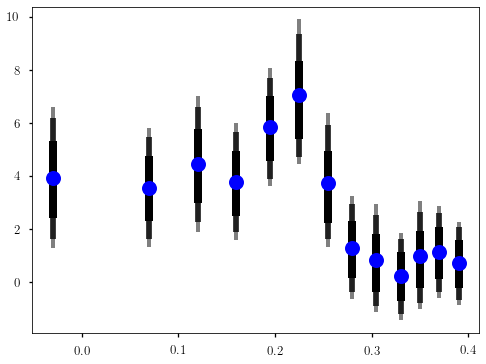

In [78]:
funcs = []
xvs = []
means = []
plt.figure(figsize=(8, 6))
for dmi, ci in zip(tqdm(dm), c):
    mean = np.sum(rhomid*dmi)/np.sum(dmi)
    std = np.sqrt(np.sum((rhomid - mean)**2*dmi)/np.sum(dmi))

    x = np.linspace(rho[0], rho[-1], 300)
    y = smooth(x, rho[:-1], dmi, std/5)

    func_dm = interp1d(x, y, kind='cubic')
    funcs.append(func_dm)

    xs = np.linspace(rho[0], rho[-1], 1000)
    mean_interp = np.sum(xs*func_dm(xs))/np.sum(func_dm(xs))
    xl_68, xr_68 = hdi(func_dm, perc=0.68, res=1E3, min=xs[0], max=xs[-1])
    xl_90, xr_90 = hdi(func_dm, perc=0.90, res=1E3, min=xs[0], max=xs[-1])
    xl_95, xr_95 = hdi(func_dm, perc=0.95, res=1E3, min=xs[0], max=xs[-1])

    xv = [[xl_95, xr_95, 4], [xl_90, xr_90, 6], [xl_68, xr_68, 8]]
    xvs.append(xv)
    means.append(mean_interp)
    plot_dot(ci, xv, mean_interp)
plt.show()

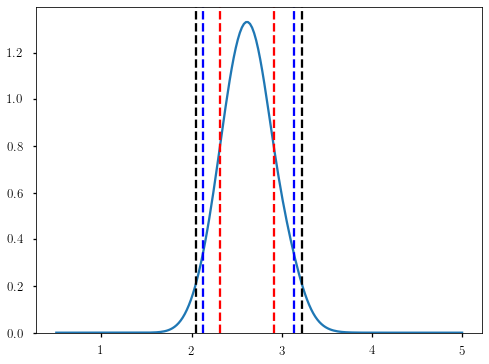

[[ 2.53 -1.35]
 [ 2.43 -1.43]
 [ 2.21 -1.61]] 2.63


In [80]:
# multiplying each pdf
def multiply_pdf(x, funcs):
    y = np.ones_like(x)
    for func in funcs:
        y *= func(x)
    return y

x = np.linspace(0.5, 5, 200)
y = multiply_pdf(x, funcs)
area = np.trapz(y, x)
y /= area

func_dm = interp1d(x, y, kind='cubic')

mean_all = np.sum(x*func_dm(x))/np.sum(func_dm(x))
xl_68, xr_68 = hdi(func_dm, perc=0.68, res=1E3, min=x[0], max=x[-1])
xl_90, xr_90 = hdi(func_dm, perc=0.90, res=1E3, min=x[0], max=x[-1])
xl_95, xr_95 = hdi(func_dm, perc=0.95, res=1E3, min=x[0], max=x[-1])

xv_all = [[xl_95, xr_95, 2], [xl_90, xr_90, 4], [xl_68, xr_68, 6]]

plt.figure(figsize=(8, 6))
plt.plot(x, func_dm(x))
plt.axvline(xl_95, c='k', ls='--')
plt.axvline(xr_95, c='k', ls='--')
plt.axvline(xl_90, c='b', ls='--')
plt.axvline(xr_90, c='b', ls='--')
plt.axvline(xl_68, c='r', ls='--')
plt.axvline(xr_68, c='r', ls='--')
plt.ylim(0)
plt.show()
sigmas = np.array(list(map(lambda l: [l[1]-mean_interp, mean_interp-l[0]], xv_all)))
print(np.round(sigmas, 2), np.round(mean_all, 2))

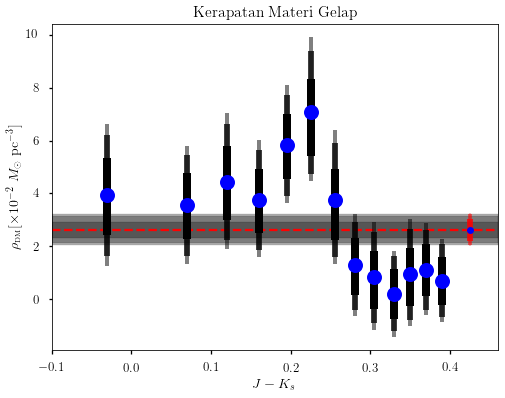

In [81]:
x = np.linspace(rho[0], rho[-1], 300)
xs = np.linspace(rho[0], rho[-1], 1000)
xlim = (c[0] - (c[-1]-c[0])/12*2, (c[-1]-c[0])/12*2+c[-1])
cs = np.linspace(xlim[0], xlim[1], 100)
plt.figure(figsize=(8, 6))
plt.axhline(mean_all, c='r', ls='--')
for xv, ci, mean in zip(xvs, c, means):
    plot_dot(ci, xv, mean)
plot_dot((c[-1]-c[0])/12+c[-1], xv_all, mean_all, ms=7, c='r')
for xv in xv_all:
    plt.fill_between(cs, xv[0], xv[1], color='k', alpha=0.3)
plt.xlim(xlim)
plt.xlabel(r'$J-K_s$')
plt.ylabel(r"$\rho_{\textup{\scriptsize DM}} [\times 10^{-2}\ M_{\odot}\ \textup{pc}^{-3}]$")
plt.title("Kerapatan Materi Gelap")
plt.savefig('darky.jpg', dpi=150)
plt.show()


# $\mu$

In [158]:
from tqdm import tqdm
import re


mu = np.linspace(0.1, 2, 100)
mu_mid = 0.5*(mu[:-1]+mu[1:])

mu0s = []
c0s = []
c1s = []
# regex whit pattern inside parenthesis
# ex. abd(123)-(234)efg -> [123, 234]
pattern = re.compile(r'\((.*?)\)')

for file in tqdm(mond_files):
    name = file.split('/')[-1]
    c0, c1 = pattern.findall(name)
    c0, c1 = float(c0), float(c1)
    c0s.append(c0)
    c1s.append(c1)
    df_mond = vaex.open(file)
    mu0 = np.exp(df_mond['log_mu0'].to_numpy())
    mu0_num_mond, _ = np.histogram(mu0, bins=mu, density=True)
    mu0s.append(mu0_num_mond)

100%|██████████| 13/13 [00:02<00:00,  4.85it/s]


In [159]:
c = np.array([c0s, c1s]).T
c = np.mean(c, axis=1)
c

array([-0.03 ,  0.07 ,  0.12 ,  0.16 ,  0.195,  0.225,  0.255,  0.28 ,
        0.305,  0.33 ,  0.35 ,  0.37 ,  0.39 ])

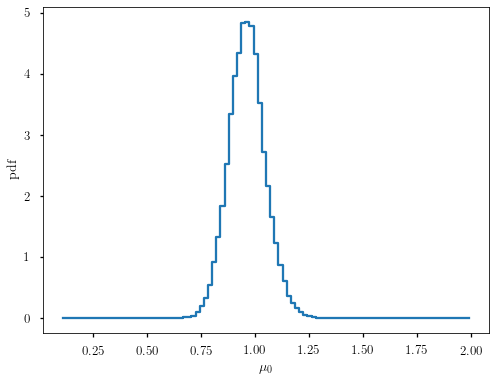

In [162]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(mu_mid, mu0s[9])
ax.set_xlabel(r'$\mu_0$')
ax.set_ylabel('pdf')
plt.show()

In [163]:
mean = np.sum(mu_mid*mu0s[0])/np.sum(mu0s[0])
std = np.sqrt(np.sum((mu_mid - mean)**2*mu0s[0])/np.sum(mu0s[0]))
print(mean, std)

0.6953239079685746 0.07968378719071897


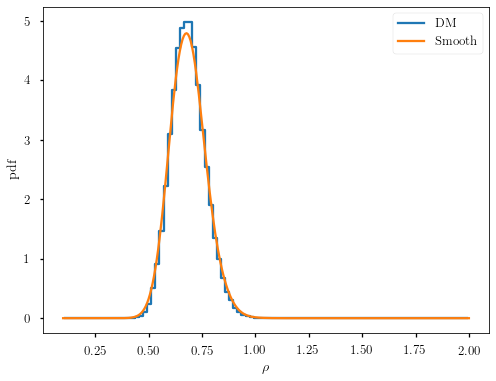

In [164]:
# smooth the distribution using gaussian window
from scipy.stats import norm

def smooth(x, xd, yd, scale):
    y_smooth = np.zeros_like(x)
    for i in range(len(x)):
        y_smooth[i] = np.sum(yd*norm.pdf(xd, x[i], scale))
    area = np.trapz(y_smooth, x)
    y_smooth /= area
    return y_smooth

x = np.linspace(mu[0], mu[-1], 300)
y = smooth(x, mu[:-1], mu0s[0], std/3)
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(mu_mid, mu0s[0], label='DM')
ax.plot(x, y, label='Smooth')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('pdf')
ax.legend()
plt.show()

In [167]:
from scipy.interpolate import interp1d

func_dm = interp1d(x, y, kind='cubic')

xs = np.linspace(mu[0], mu[-1], 1000)
mean_interp = np.sum(xs*func_dm(xs))/np.sum(func_dm(xs))
xl_68, xr_68 = hdi(func_dm, perc=0.68, res=1E3, min=xs[0], max=xs[-1])
xl_90, xr_90 = hdi(func_dm, perc=0.90, res=1E3, min=xs[0], max=xs[-1])
xl_95, xr_95 = hdi(func_dm, perc=0.95, res=1E3, min=xs[0], max=xs[-1])

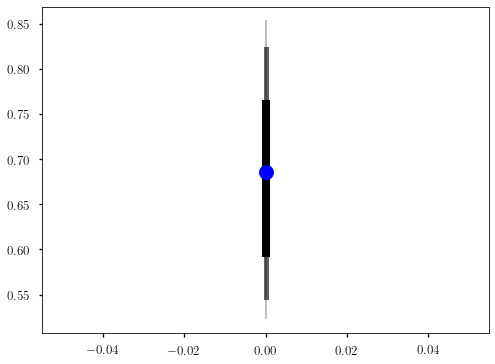

In [168]:
N = 100
# plot

def plot_dot(x, xv, mean, N=100, ms=15, c='k'):
    maks_size = list(map(lambda l: l[2], xv))
    for xi in xv:
        line = np.linspace(xi[0], xi[1], N)
        plt.plot(np.repeat(x, N), line, lw=xi[2], c=c, alpha=xi[2]/8)
    plt.plot(x, mean, c='b', marker='o', ms=ms)

xv = [[xl_95, xr_95, 2], [xl_90, xr_90, 5], [xl_68, xr_68, 8]]

plt.figure(figsize=(8, 6))
plot_dot(0, xv, mean_interp)
# remove x values
# plt.xticks([])
plt.show()

100%|██████████| 13/13 [00:36<00:00,  2.84s/it]


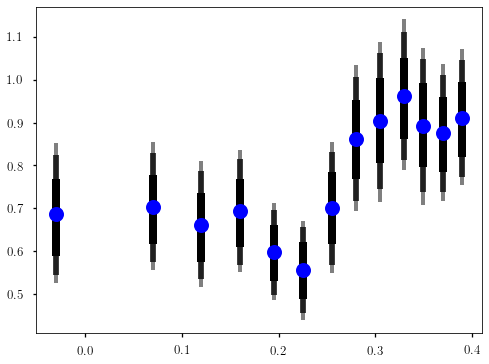

In [169]:
funcs = []
xvs = []
means = []
plt.figure(figsize=(8, 6))
for dmi, ci in zip(tqdm(mu0s), c):
    mean = np.sum(mu_mid*dmi)/np.sum(dmi)
    std = np.sqrt(np.sum((mu_mid - mean)**2*dmi)/np.sum(dmi))

    x = np.linspace(mu[0], mu[-1], 300)
    y = smooth(x, mu[:-1], dmi, std/5)

    func_dm = interp1d(x, y, kind='cubic')
    funcs.append(func_dm)

    xs = np.linspace(mu[0], mu[-1], 1000)
    mean_interp = np.sum(xs*func_dm(xs))/np.sum(func_dm(xs))
    xl_68, xr_68 = hdi(func_dm, perc=0.68, res=1E3, min=xs[0], max=xs[-1])
    xl_90, xr_90 = hdi(func_dm, perc=0.90, res=1E3, min=xs[0], max=xs[-1])
    xl_95, xr_95 = hdi(func_dm, perc=0.95, res=1E3, min=xs[0], max=xs[-1])

    xv = [[xl_95, xr_95, 4], [xl_90, xr_90, 6], [xl_68, xr_68, 8]]
    xvs.append(xv)
    means.append(mean_interp)
    plot_dot(ci, xv, mean_interp)
plt.show()

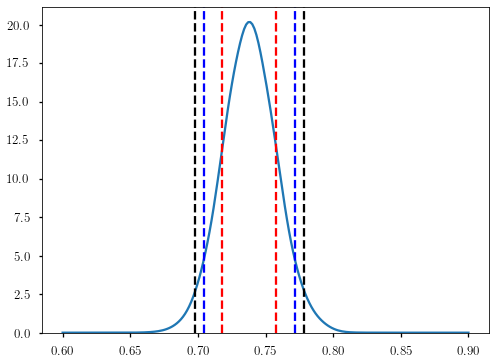

[[-0.13  0.21]
 [-0.14  0.21]
 [-0.15  0.19]] 0.74


In [172]:
# multiplying each pdf
def multiply_pdf(x, funcs):
    y = np.ones_like(x)
    for func in funcs:
        y *= func(x)
    return y

x = np.linspace(0.6, .9, 200)
y = multiply_pdf(x, funcs)
area = np.trapz(y, x)
y /= area

func_dm = interp1d(x, y, kind='cubic')

mean_all = np.sum(x*func_dm(x))/np.sum(func_dm(x))
xl_68, xr_68 = hdi(func_dm, perc=0.68, res=1E3, min=x[0], max=x[-1])
xl_90, xr_90 = hdi(func_dm, perc=0.90, res=1E3, min=x[0], max=x[-1])
xl_95, xr_95 = hdi(func_dm, perc=0.95, res=1E3, min=x[0], max=x[-1])

xv_all = [[xl_95, xr_95, 2], [xl_90, xr_90, 4], [xl_68, xr_68, 6]]

plt.figure(figsize=(8, 6))
plt.plot(x, func_dm(x))
plt.axvline(xl_95, c='k', ls='--')
plt.axvline(xr_95, c='k', ls='--')
plt.axvline(xl_90, c='b', ls='--')
plt.axvline(xr_90, c='b', ls='--')
plt.axvline(xl_68, c='r', ls='--')
plt.axvline(xr_68, c='r', ls='--')
plt.ylim(0)
plt.show()
sigmas = np.array(list(map(lambda l: [l[1]-mean_interp, mean_interp-l[0]], xv_all)))
print(np.round(sigmas, 2), np.round(mean_all, 2))

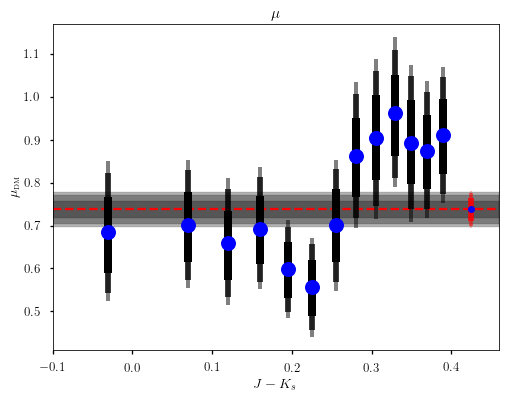

In [171]:
x = np.linspace(mu[0], mu[-1], 300)
xs = np.linspace(mu[0], mu[-1], 1000)
xlim = (c[0] - (c[-1]-c[0])/12*2, (c[-1]-c[0])/12*2+c[-1])
cs = np.linspace(xlim[0], xlim[1], 100)
plt.figure(figsize=(8, 6))
plt.axhline(mean_all, c='r', ls='--')
for xv, ci, mean in zip(xvs, c, means):
    plot_dot(ci, xv, mean)
plot_dot((c[-1]-c[0])/12+c[-1], xv_all, mean_all, ms=7, c='r')
for xv in xv_all:
    plt.fill_between(cs, xv[0], xv[1], color='k', alpha=0.3)
plt.xlim(xlim)
plt.xlabel(r'$J-K_s$')
plt.ylabel(r"$\mu_{\textup{\scriptsize DM}}$")
plt.title(r"$\mu$")
# plt.savefig('darky.jpg', dpi=150)
plt.show()


simple

In [107]:
def inv_interpolation_simple(mu):
    return mu/(1-mu)

def inv_interpolation_standard(mu):
    return mu/np.sqrt(1-mu**2)

In [174]:
inv_interpolation_simple(0.74)

2.846153846153846

In [176]:
0.17/0.74*inv_interpolation_simple(0.74)

0.6538461538461539

In [175]:
inv_interpolation_standard(0.74)

1.1001969118825972

In [177]:
0.17/0.74*inv_interpolation_standard(0.74)

0.2527479392162723